## Using the Pandas Sample Method 

In [2]:
##import libraries 

#dataprep
import pandas as pd 
from sklearn.model_selection import train_test_split
import numpy as np 

##keras stuff 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

#saving prediction output 
import pickle

#graphing
import matplotlib.pyplot as plt

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
image_df = pd.read_csv('./data_multi_label/full_image_df.csv')
image_df = image_df.drop(columns='Unnamed: 0')
image_df.image_saved_as = image_df.image_saved_as.apply(lambda x: x +'.png')

print (image_df.shape)

image_df.head()

(2313, 17)


,AKA,AKE,AKH,AKY,ALC,AMN,BNZ,COC,COH,COO,COONH2,KEY,OH,SHH,cid,image_saved_as,ring
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13156,3_bromo_2_butanone_13156.png,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62791,3_bromo_2_butanone_62791.png,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13142,3_bromo_2_butanone_13142.png,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12413224,3_bromo_2_butanone_12413224.png,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,123858546,3_bromo_2_butanone_123858546.png,0.0


In [4]:
train = image_df.sample(frac = 0.80, random_state=1) # sampling with out replacement is the default

print (train.shape)

train.head()

(1850, 17)


,AKA,AKE,AKH,AKY,ALC,AMN,BNZ,COC,COH,COO,COONH2,KEY,OH,SHH,cid,image_saved_as,ring
959,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59922317,2_aminopropane_59922317.png,0.0
47,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3822501,4_picolylamine_3822501.png,1.0
1123,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,15114725,3_trimethylsilyl_ethynylbenzaldehyde_15114725.png,1.0
553,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,57616908,lysine_57616908.png,0.0
996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87701396,2_aminopropane_87701396.png,0.0


In [5]:
#Set a mask equal to the cid's which are in the training set that we made using pandas.sample 
mask = train['cid']

#for loop did not like the pandas.series, so I converted to a list 
mask = list(mask)


#this for loop checks the full dataframe (image_df) cid's against the ones in train
index_to_drop = []
for index, entry in enumerate(image_df['cid']):
#     print (entry)
    if entry in mask:
        index_to_drop.append(index)


# build the test dataframe by dropping the indicies which are not overlapping 
test = image_df.drop(labels=index_to_drop, axis=0)

print (test.shape)
print ('--'*25)
print (train.shape)
print ('--'*25)
print (image_df.shape)

test.head()

(463, 17)
--------------------------------------------------
(1850, 17)
--------------------------------------------------
(2313, 17)


,AKA,AKE,AKH,AKY,ALC,AMN,BNZ,COC,COH,COO,COONH2,KEY,OH,SHH,cid,image_saved_as,ring
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,123858546,3_bromo_2_butanone_123858546.png,0.0
7,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,14692245,3_bromo_2_butanone_14692245.png,0.0
15,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12238842,4_picolylamine_12238842.png,1.0
20,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12425236,4_picolylamine_12425236.png,1.0
25,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87523068,4_picolylamine_87523068.png,1.0


## Creating the ImageDataGenerator

### Must define the labels and the image location first 

In [6]:
# We are going to look at a subset of features first 
features = ['AKA', 'AKE', 'ring', 'BNZ', 'image_saved_as']

#apply those feature constraints to the dataframes 
train_features = train[features]
test_features = test[features]

train_features.head()

,AKA,AKE,ring,BNZ,image_saved_as
959,1.0,0.0,0.0,0.0,2_aminopropane_59922317.png
47,1.0,0.0,1.0,1.0,4_picolylamine_3822501.png
1123,1.0,0.0,1.0,1.0,3_trimethylsilyl_ethynylbenzaldehyde_15114725.png
553,1.0,0.0,0.0,0.0,lysine_57616908.png
996,1.0,0.0,0.0,0.0,2_aminopropane_87701396.png


In [7]:
#Conver the float into into ints
train_features[["AKA", "AKE", "ring", "BNZ"]] = train_features[["AKA", "AKE", "ring", "BNZ"]].astype(int)
test_features[["AKA", "AKE", "ring", "BNZ"]] = test_features[["AKA", "AKE", "ring", "BNZ"]].astype(int)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [8]:
train_features.head()

,AKA,AKE,ring,BNZ,image_saved_as
959,1,0,0,0,2_aminopropane_59922317.png
47,1,0,1,1,4_picolylamine_3822501.png
1123,1,0,1,1,3_trimethylsilyl_ethynylbenzaldehyde_15114725.png
553,1,0,0,0,lysine_57616908.png
996,1,0,0,0,2_aminopropane_87701396.png


In [9]:
test_features.head()

,AKA,AKE,ring,BNZ,image_saved_as
4,1,0,0,0,3_bromo_2_butanone_123858546.png
7,1,0,0,0,3_bromo_2_butanone_14692245.png
15,1,0,1,1,4_picolylamine_12238842.png
20,1,0,1,1,4_picolylamine_12425236.png
25,1,0,1,1,4_picolylamine_87523068.png


In [10]:
# using assign to make a label column, this is a req for the imagedatagen class, this is not unlike the way data must
# formatted when getting data ready for scala 

train_features = train_features.assign(label = list(train_features['AKA'].astype(str) +',' + train_features['AKE'].astype('str') + ','
                                  + train_features['ring'].astype(str) + ',' + train_features['BNZ'].astype('str')))

test_features = test_features.assign(label = list(test_features['AKA'].astype(str) +',' + test_features['AKE'].astype('str') + ','
                                  + test_features['ring'].astype(str) + ',' + test_features['BNZ'].astype('str')))

In [11]:
# # Two for loops which convert them into a list 
# new_label = []
# for entry in train_features['label']:
# #     print (entry)
#     a  = list(entry)
#     a  = [x for x in a if x != ',']
#     new_label.append(a)

# train_features['label'] = new_label


# new_label_x = []
# for entry in test_features['label']:
# #     print (entry)
#     a  = list(entry)
#     a  = [x for x in a if x != ',']
#     new_label_x.append(a)

# test_features['label'] = new_label_x
    

In [12]:
## for loop... 

label_list = []
for entry in train_features['label']:
#     print (entry)
    new_label = list(entry)
    label_list.append(new_label)
    
train_features['label'] = label_list 

label_list_x = []
for entry in test_features['label']:
#     print (entry)
    new_label = list(entry)
    label_list_x.append(new_label)
    
test_features['label'] = label_list_x 

In [13]:
train_features.head()

,AKA,AKE,ring,BNZ,image_saved_as,label
959,1,0,0,0,2_aminopropane_59922317.png,"[1, ,, 0, ,, 0, ,, 0]"
47,1,0,1,1,4_picolylamine_3822501.png,"[1, ,, 0, ,, 1, ,, 1]"
1123,1,0,1,1,3_trimethylsilyl_ethynylbenzaldehyde_15114725.png,"[1, ,, 0, ,, 1, ,, 1]"
553,1,0,0,0,lysine_57616908.png,"[1, ,, 0, ,, 0, ,, 0]"
996,1,0,0,0,2_aminopropane_87701396.png,"[1, ,, 0, ,, 0, ,, 0]"


In [14]:
test_features.head()

,AKA,AKE,ring,BNZ,image_saved_as,label
4,1,0,0,0,3_bromo_2_butanone_123858546.png,"[1, ,, 0, ,, 0, ,, 0]"
7,1,0,0,0,3_bromo_2_butanone_14692245.png,"[1, ,, 0, ,, 0, ,, 0]"
15,1,0,1,1,4_picolylamine_12238842.png,"[1, ,, 0, ,, 1, ,, 1]"
20,1,0,1,1,4_picolylamine_12425236.png,"[1, ,, 0, ,, 1, ,, 1]"
25,1,0,1,1,4_picolylamine_87523068.png,"[1, ,, 0, ,, 1, ,, 1]"


In [15]:
## we are stilling getting the wrong number of classes... 



### Data is properly formatted, now we can begin with the imagedatagen class 

In [16]:
#Instantiate the ImageDataGenerator 

datagen = ImageDataGenerator(rotation_range=30,rescale=1./255, validation_split=0.25, shear_range=0.2)

In [17]:
# We are fitting this class

batch = 8 #updating the size

training_generator = datagen.flow_from_dataframe(
    train_features, 
    directory = './images_multi_label/',
    x_col = 'image_saved_as',
    y_col = 'label',
    subset='training',
    target_size = (300,300),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    batch_size = batch,
#     drop_duplicates = False,
    save_to_dir = '/Users/patrickcavins/Desktop/augment/',
    save_format = '.png'
)

Found 1388 images belonging to 3 classes.


In [18]:
validation_generator = datagen.flow_from_dataframe(
    train_features, 
    directory = './images_multi_label/',
    x_col = 'image_saved_as',
    y_col = 'label',
    subset='validation',
    target_size = (300,300),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    batch_size = batch,
#     drop_duplicates = False,
    save_to_dir = '/Users/patrickcavins/Desktop/augment/',
    save_format = '.png'
)

Found 462 images belonging to 3 classes.


In [20]:
test_datagen = ImageDataGenerator(rescale=1./255.)


test_generator=test_datagen.flow_from_dataframe(
dataframe= test_features,
directory="./images_multi_label/",
x_col="image_saved_as",
y_col=None,
batch_size=batch,
# seed=42,
shuffle=False,
class_mode=None,
color_mode = 'grayscale',
target_size=(300,300))

Found 463 images.


In [21]:
model = Sequential()

#add more layers/filter because of image

model.add(Conv2D(128, (3, 3), input_shape=(300, 300, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3))) #should I increase? It should learn more complicated relations 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3, 3))) #Same thing here... maybe 32,64, 128... 
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.95)) # 95% 
model.add(Dense(3)) # can convert back to 4 
model.add(Activation('sigmoid'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 128)     1280      
_________________________________________________________________
activation_1 (Activation)    (None, 298, 298, 128)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 128)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 147, 147, 64)      73792     
_________________________________________________________________
activation_2 (Activation)    (None, 147, 147, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxP

In [35]:
from keras.optimizers import SGD
from keras.optimizers import Adam



model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.0001, momentum=0.9), metrics=['accuracy'])

In [36]:
history = model.fit_generator(generator = training_generator, 
                              steps_per_epoch= 10, 
                              epochs=10, validation_data= validation_generator, 
                                  validation_steps = 10
                                )

Epoch 1/10
10/10 [==============================] - 98s 10s/step - loss: 0.1717 - acc: 0.9760 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/10
 5/10 [==============>...............] - ETA: 36s - loss: 0.1531 - acc: 0.9750

KeyboardInterrupt: 

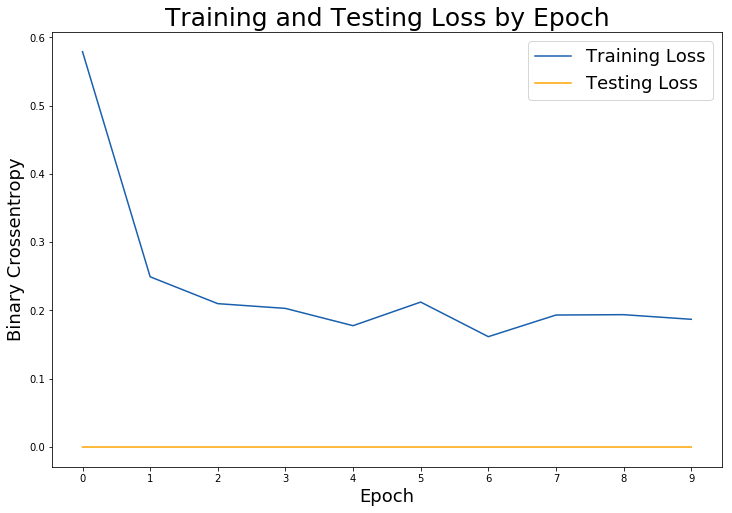

In [30]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Binary Crossentropy', fontsize = 18)
plt.xticks(range(10))

plt.legend(fontsize = 18);


In [31]:
#Testing 
metric = model.evaluate_generator(validation_generator, steps=10, verbose=1)



labels = model.metrics_names


# Show model performance.
print(f'{labels[0]}: {metric[0]}')
print(f'{labels[1]}: {metric[1]}')

10/10 [==============================] - 18s 2s/step
loss: 1.192093321833454e-07
acc: 1.0


In [32]:
test_generator.reset()

pred=model.predict_generator(test_generator,
steps=10,
verbose=1)

10/10 [==============================] - 27s 3s/step


In [33]:
pred[0]

array([1., 1., 1.], dtype=float32)

In [39]:
# pred_class_indices = np.argmax(pred, axis = 1) 

In [40]:
# pred_class_indices

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,